In [1]:
import pandas as pd
from IPython.display import display
#import warnings
#warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

# K Fold Cross Validation imports 
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC

# Grid Search import 
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.utils import resample

In [2]:
# 📂 Load Datasets
breast_cancer = pd.read_csv("breast-cancer.csv")
loan_data = pd.read_csv("loan_data.csv")
stroke_data = pd.read_csv("healthcare-dataset-stroke-data.csv")
income_train = pd.read_csv("income-train.csv")

In [3]:
print(loan_data.columns.tolist())


['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file', 'loan_status']


In [4]:


# Preprocessing

# Breast Cancer Dataset
if 'diagnosis' in breast_cancer.columns:
    breast_cancer["diagnosis_code"] = breast_cancer["diagnosis"].astype("category").cat.codes

# Loan Dataset
if 'person_gender' in loan_data.columns:
    loan_data["gender_code"] = loan_data["person_gender"].map({"male": 1, "female": 0})
if 'previous_loan_defaults_on_file' in loan_data.columns:
    loan_data["prev_default_code"] = loan_data["previous_loan_defaults_on_file"].map({"Yes": 1, "No": 0})
if 'loan_intent' in loan_data.columns:
    loan_data["loan_intent_code"] = loan_data["loan_intent"].astype("category").cat.codes
if 'person_home_ownership' in loan_data.columns:
    loan_data["home_ownership_code"] = loan_data["person_home_ownership"].astype("category").cat.codes
if 'person_education' in loan_data.columns:
    loan_data["education_code"] = loan_data["person_education"].astype("category").cat.codes


# Stroke Dataset
if 'gender' in stroke_data.columns:
    stroke_data["gender_code"] = stroke_data["gender"].astype("category").cat.codes
if 'ever_married' in stroke_data.columns:
    stroke_data["married_code"] = stroke_data["ever_married"].astype("category").cat.codes
if 'work_type' in stroke_data.columns:
    stroke_data["work_code"] = stroke_data["work_type"].astype("category").cat.codes
if 'Residence_type' in stroke_data.columns:
    stroke_data["residence_code"] = stroke_data["Residence_type"].astype("category").cat.codes
if 'smoking_status' in stroke_data.columns:
    stroke_data["smoking_code"] = stroke_data["smoking_status"].astype("category").cat.codes
if 'bmi' in stroke_data.columns:
    stroke_data["bmi"] = stroke_data["bmi"].fillna(stroke_data["bmi"].mean()) #mean because assuming average bmi

# Income Train Dataset
if 'workclass' in income_train.columns:
    income_train["workclass_code"] = income_train["workclass"].astype("category").cat.codes
if 'education' in income_train.columns:
    income_train["education_code"] = income_train["education"].astype("category").cat.codes
if 'marital_status' in income_train.columns:
    income_train["marital_code"] = income_train["marital_status"].astype("category").cat.codes
if 'occupation' in income_train.columns:
    income_train["occupation_code"] = income_train["occupation"].astype("category").cat.codes
if 'relationship' in income_train.columns:
    income_train["relationship_code"] = income_train["relationship"].astype("category").cat.codes
if 'race' in income_train.columns:
    income_train["race_code"] = income_train["race"].astype("category").cat.codes
if 'sex' in income_train.columns:
    income_train["sex_code"] = income_train["sex"].astype("category").cat.codes

# Preprocessing completed
print("\nPreprocessing completed. Below are the first few rows of each dataset after preprocessing:\n")

print("Breast Cancer Dataset:")
display(breast_cancer.head())

print("\nLoan Approval Dataset:")
display(loan_data.head())

print("\nStroke Dataset:")
display(stroke_data.head())

print("\nIncome Train Dataset:")
display(income_train.head())



Preprocessing completed. Below are the first few rows of each dataset after preprocessing:

Breast Cancer Dataset:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_code
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1



Loan Approval Dataset:


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,gender_code,prev_default_code,loan_intent_code,home_ownership_code,education_code
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,0,0,4,3,4
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,0,1,1,2,3
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,0,0,3,0,3
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1,0,0,3,3,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1,1,0,3,3,4



Stroke Dataset:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_code,married_code,work_code,residence_code,smoking_code
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,1,1,2,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,0,1,3,0,2
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,1,1,2,0,2
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,0,1,2,1,3
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,0,1,3,0,2



Income Train Dataset:


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K,workclass_code,education_code,occupation_code,relationship_code,race_code
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1,3,10,3,1,4
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0,3,2,7,3,4
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1,3,9,3,0,4
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0,6,5,13,0,4
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0,6,15,7,1,2


In [5]:
#defined features and target
# Breast Cancer
bc_features = breast_cancer.drop(columns=["diagnosis", "diagnosis_code"]).select_dtypes(include='number')
bc_target = breast_cancer["diagnosis_code"]

# Loan
loan_features = loan_data.drop(columns=["loan_status"]).select_dtypes(include='number')
loan_target = loan_data["loan_status"]

# Stroke
stroke_features = stroke_data.drop(columns=["stroke"]).select_dtypes(include='number')
stroke_target = stroke_data["stroke"]

# Income
income_features = income_train.drop(columns=["income_>50K"]).select_dtypes(include='number')
income_target = income_train["income_>50K"].astype("category").cat.codes



Results for Breast Cancer using Decision Tree Classifier:
Accuracy: 0.935672514619883
Confusion Matrix:
 [[100   8]
 [  3  60]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       108
           1       0.88      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



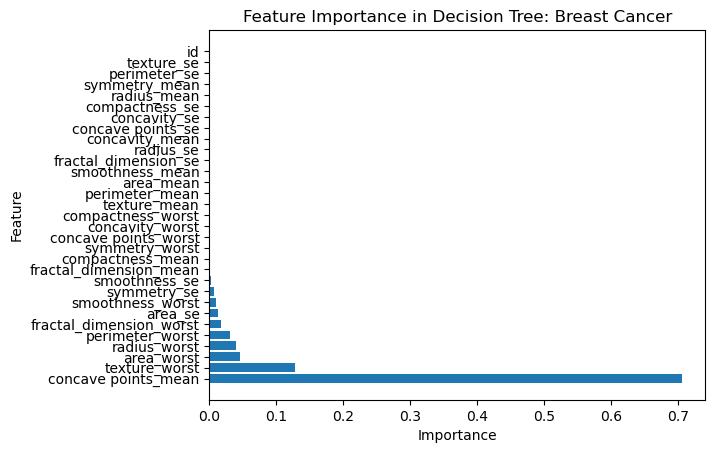


Results for Loan using Decision Tree Classifier:
Accuracy: 0.896962962962963
Confusion Matrix:
 [[9766  727]
 [ 664 2343]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93     10493
           1       0.76      0.78      0.77      3007

    accuracy                           0.90     13500
   macro avg       0.85      0.85      0.85     13500
weighted avg       0.90      0.90      0.90     13500



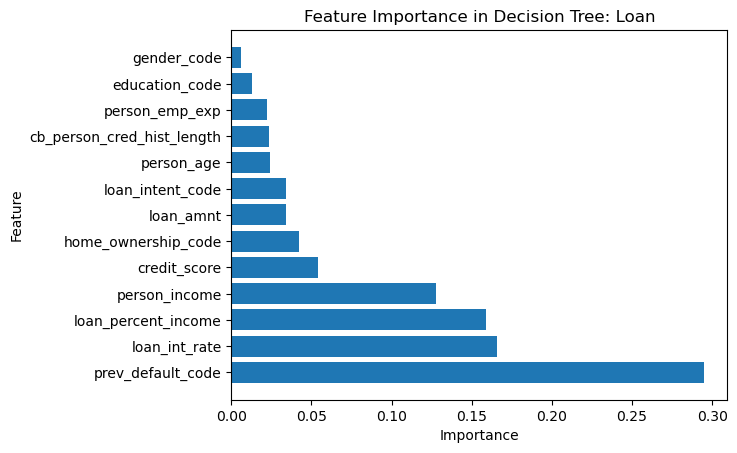


Results for Stroke using Decision Tree Classifier:
Accuracy: 0.9093281148075668
Confusion Matrix:
 [[1382   62]
 [  77   12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1444
           1       0.16      0.13      0.15        89

    accuracy                           0.91      1533
   macro avg       0.55      0.55      0.55      1533
weighted avg       0.90      0.91      0.91      1533



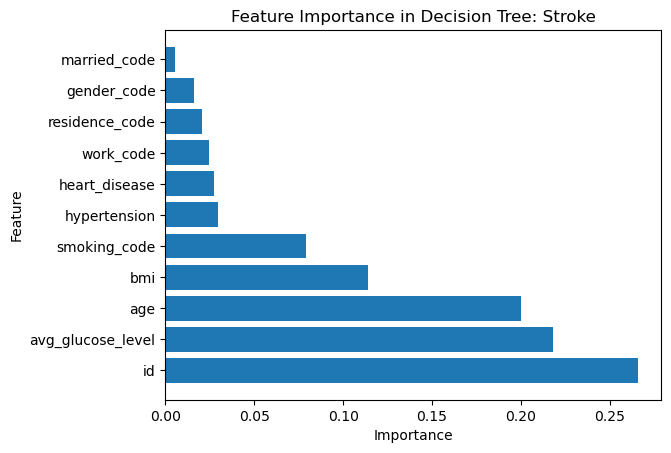


Results for Income using Decision Tree Classifier:
Accuracy: 0.8086897179253867
Confusion Matrix:
 [[8732 1315]
 [1208 1933]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87     10047
           1       0.60      0.62      0.61      3141

    accuracy                           0.81     13188
   macro avg       0.74      0.74      0.74     13188
weighted avg       0.81      0.81      0.81     13188



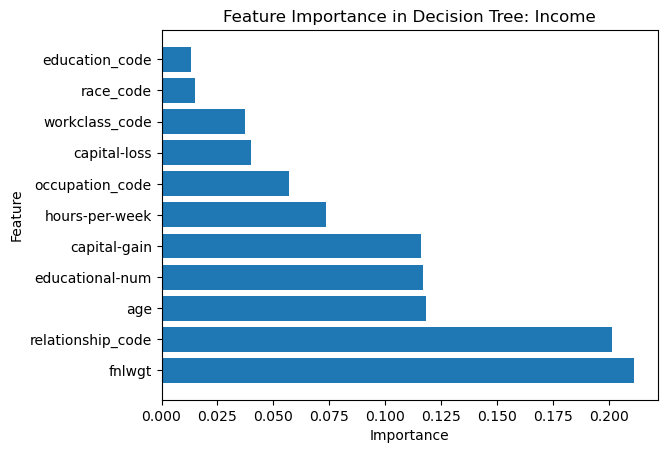

In [6]:
def train_decision_tree(X, y, dataset_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\nResults for {dataset_name} using Decision Tree Classifier:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    importance = model.feature_importances_
    feature_names = X.columns  

    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    importance_df.sort_values(by='Importance', ascending=False, inplace=True)
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Feature Importance in Decision Tree: {dataset_name}')
    plt.show()
train_decision_tree(bc_features, bc_target, "Breast Cancer")
train_decision_tree(loan_features, loan_target, "Loan")
train_decision_tree(stroke_features, stroke_target, "Stroke")
train_decision_tree(income_features, income_target, "Income")



🌲 Results for Breast Cancer using Random Forest Classifier:
Accuracy: 0.9766081871345029
Confusion Matrix:
 [[107   1]
 [  3  60]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



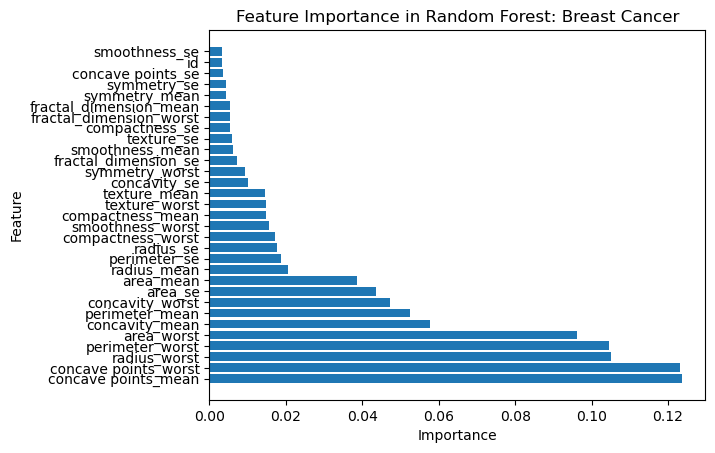


🌲 Results for Loan using Random Forest Classifier:
Accuracy: 0.924
Confusion Matrix:
 [[10159   334]
 [  692  2315]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     10493
           1       0.87      0.77      0.82      3007

    accuracy                           0.92     13500
   macro avg       0.91      0.87      0.89     13500
weighted avg       0.92      0.92      0.92     13500



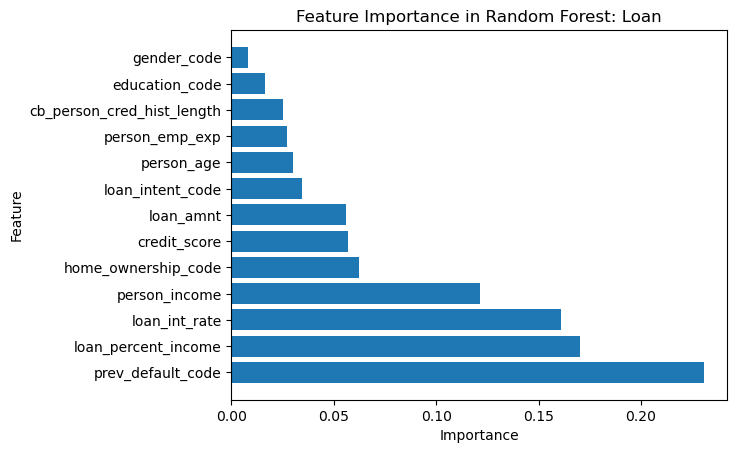


🌲 Results for Stroke using Random Forest Classifier:
Accuracy: 0.9399869536855838
Confusion Matrix:
 [[1441    3]
 [  89    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.48      1533
weighted avg       0.89      0.94      0.91      1533



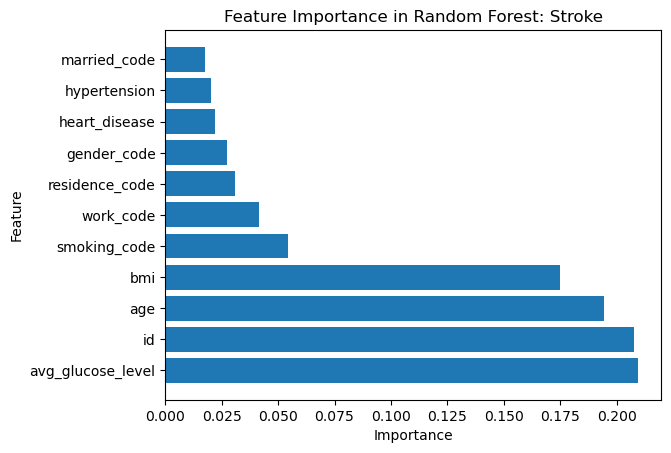


🌲 Results for Income using Random Forest Classifier:
Accuracy: 0.8531240521686382
Confusion Matrix:
 [[9347  700]
 [1237 1904]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91     10047
           1       0.73      0.61      0.66      3141

    accuracy                           0.85     13188
   macro avg       0.81      0.77      0.78     13188
weighted avg       0.85      0.85      0.85     13188



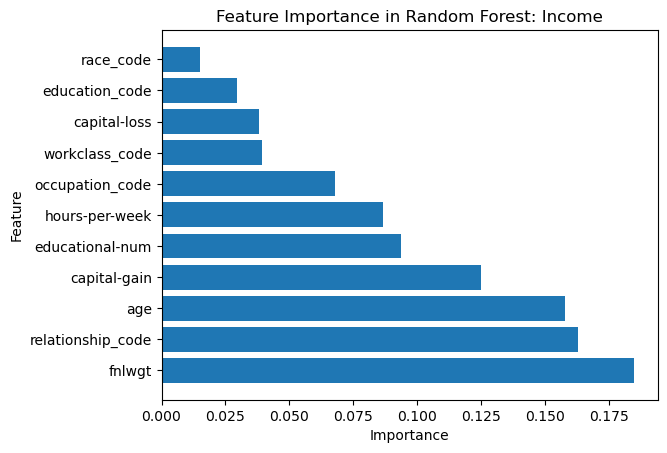

In [7]:
# Function to train and evaluate a random forest
def train_random_forest(X, y, dataset_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n🌲 Results for {dataset_name} using Random Forest Classifier:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    importance = model.feature_importances_

    feature_names = X.columns  
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    importance_df.sort_values(by='Importance', ascending=False, inplace=True)
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Feature Importance in Random Forest: {dataset_name}')
    plt.show()

train_random_forest(bc_features, bc_target, "Breast Cancer")
train_random_forest(loan_features, loan_target, "Loan")
train_random_forest(stroke_features, stroke_target, "Stroke")
train_random_forest(income_features, income_target, "Income")


📈 Results for Breast Cancer using Logistic Regression:
Accuracy: 0.9590643274853801
Confusion Matrix:
 [[107   1]
 [  6  57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       108
           1       0.98      0.90      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



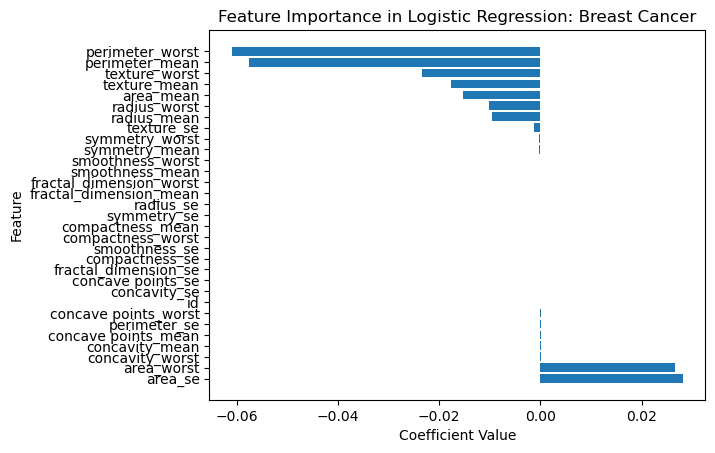

C:\Users\asraf\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



📈 Results for Loan using Logistic Regression:
Accuracy: 0.8805185185185185
Confusion Matrix:
 [[9697  796]
 [ 817 2190]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92     10493
           1       0.73      0.73      0.73      3007

    accuracy                           0.88     13500
   macro avg       0.83      0.83      0.83     13500
weighted avg       0.88      0.88      0.88     13500



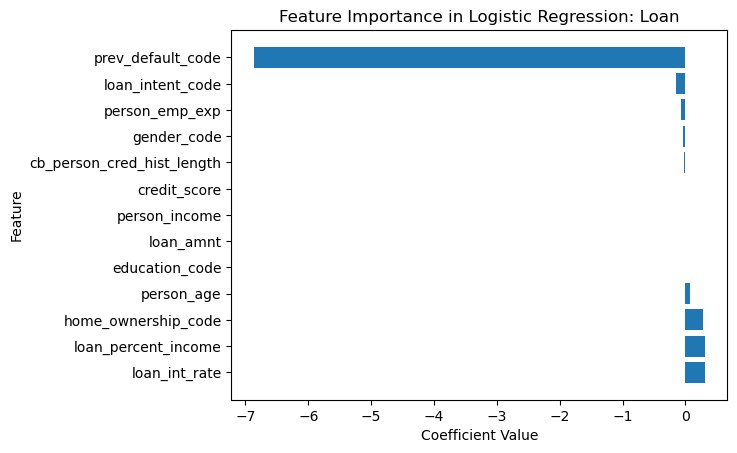


📈 Results for Stroke using Logistic Regression:
Accuracy: 0.9393346379647749
Confusion Matrix:
 [[1439    5]
 [  88    1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.17      0.01      0.02        89

    accuracy                           0.94      1533
   macro avg       0.55      0.50      0.49      1533
weighted avg       0.90      0.94      0.91      1533



C:\Users\asraf\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


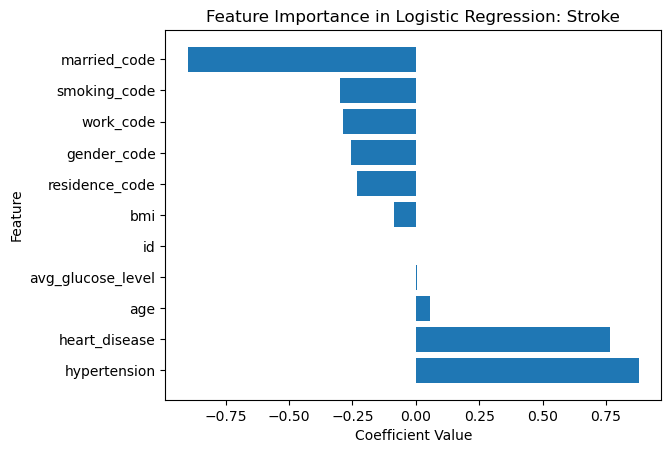


📈 Results for Income using Logistic Regression:
Accuracy: 0.799969669396421
Confusion Matrix:
 [[9632  415]
 [2223  918]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.96      0.88     10047
           1       0.69      0.29      0.41      3141

    accuracy                           0.80     13188
   macro avg       0.75      0.63      0.64     13188
weighted avg       0.78      0.80      0.77     13188



C:\Users\asraf\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


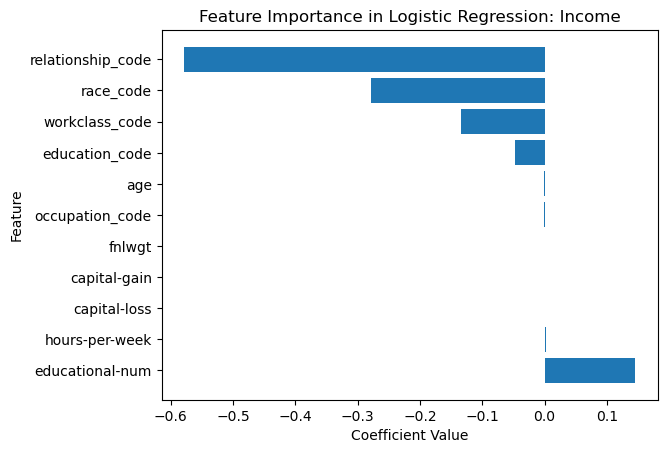

In [8]:
# Function to train and evaluate logistic regression
def train_logistic_regression(X, y, dataset_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = LogisticRegression(max_iter=1000)  # increase iterations to ensure convergence
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n📈 Results for {dataset_name} using Logistic Regression:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    importance = model.coef_[0]
    feature_names = X.columns

    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    importance_df.sort_values(by='Importance', ascending=False, inplace=True)
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.title(f'Feature Importance in Logistic Regression: {dataset_name}')
    plt.show()

train_logistic_regression(bc_features, bc_target, "Breast Cancer")
train_logistic_regression(loan_features, loan_target, "Loan")
train_logistic_regression(stroke_features, stroke_target, "Stroke")
train_logistic_regression(income_features, income_target, "Income")

In [9]:
# Function to train and evaluate K-Nearest Neighbors
def train_knn(X, y, dataset_name, k=5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\nResults for {dataset_name} using K-Nearest Neighbors (k={k}):")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # KNN does not provide native feature importances
    feature_names = X.columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': [0]*len(feature_names)})


In [10]:
train_knn(bc_features, bc_target, "Breast Cancer")
train_knn(loan_features, loan_target, "Loan")
train_knn(stroke_features, stroke_target, "Stroke")
train_knn(income_features, income_target, "Income")


Results for Breast Cancer using K-Nearest Neighbors (k=5):
Accuracy: 0.7134502923976608
Confusion Matrix:
 [[96 12]
 [37 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.89      0.80       108
           1       0.68      0.41      0.51        63

    accuracy                           0.71       171
   macro avg       0.70      0.65      0.66       171
weighted avg       0.71      0.71      0.69       171


Results for Loan using K-Nearest Neighbors (k=5):
Accuracy: 0.8305925925925925
Confusion Matrix:
 [[9694  799]
 [1488 1519]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89     10493
           1       0.66      0.51      0.57      3007

    accuracy                           0.83     13500
   macro avg       0.76      0.71      0.73     13500
weighted avg       0.82      0.83      0.82     13500


Results for Stroke using K-Nearest Neighbors

C:\Users\asraf\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\asraf\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\asraf\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Results for Income using K-Nearest Neighbors (k=5):
Accuracy: 0.7772217167121626
Confusion Matrix:
 [[9258  789]
 [2149  992]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86     10047
           1       0.56      0.32      0.40      3141

    accuracy                           0.78     13188
   macro avg       0.68      0.62      0.63     13188
weighted avg       0.75      0.78      0.75     13188



In [11]:
def cross_val(X, y, dataset_name, k=5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = LogisticRegression(max_iter = 2000)
    kf = KFold(n_splits=k)
    score = cross_val_score(model, X, y, cv=kf)
    
    print(f"\nResults for {dataset_name} using K-Fold Cross-Validation (k={k}):")
    print("Cross Validation Scores are {}".format(score))
    print("Average Cross Valiation Score :{}".format(score.mean()))
    

In [12]:
cross_val(bc_features, bc_target, "Breast Cancer")
cross_val(loan_features, loan_target, "Loan")
cross_val(stroke_features, stroke_target, "Stroke")
cross_val(income_features, income_target, "Income")


Results for Breast Cancer using K-Fold Cross-Validation (k=5):
Cross Validation Scores are [0.85087719 0.90350877 0.95614035 0.93859649 0.90265487]
Average Cross Valiation Score :0.9103555348548362


C:\Users\asraf\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asraf\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


Results for Loan using K-Fold Cross-Validation (k=5):
Cross Validation Scores are [0.87155556 0.88444444 0.87077778 0.89277778 0.86922222]
Average Cross Valiation Score :0.8777555555555556


C:\Users\asraf\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asraf\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


Results for Stroke using K-Fold Cross-Validation (k=5):
Cross Validation Scores are [       nan 1.         1.         0.99804305 1.        ]
Average Cross Valiation Score :nan


C:\Users\asraf\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asraf\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


Results for Income using K-Fold Cross-Validation (k=5):
Cross Validation Scores are [0.80391265 0.80345769 0.80900921 0.80195655 0.8022978 ]
Average Cross Valiation Score :0.8041267803358737


C:\Users\asraf\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
def grid_search(X, y, model=None, k=5):
    # Sample a smaller portion of the dataset (e.g., 30%)
    X_sample, y_sample = resample(X, y, replace=False, n_samples=int(len(X) * 0.3), random_state=42)

    # Define the model and parameter grid
    model = svm.SVC()
    param_grid = {
        'C': [0.25, 0.5, 0.75, 1],
        'kernel': ['linear', 'rbf']
    }

    # Perform Grid Search with cross-validation
    grid = GridSearchCV(model, param_grid, cv=k)
    grid.fit(X_sample, y_sample)

    # Print best results
    print("Best Hyperparameters: ", grid.best_params_)
    print("Best accuracy: ", grid.best_score_)
    

In [ ]:
grid_search(bc_features, bc_target, "Breast Cancer")
grid_search(loan_features, loan_target, "Loan")
grid_search(stroke_features, stroke_target, "Stroke")
grid_search(income_features, income_target, "Income")